# **Tutorial** - Advanced Customization in BERTopic
(last updated 11-09-2022)

In this tutorial, we will go through some advanced customization options in BERTopic. This includes hyperparameters, optimization, custom sub-models, and more!

<br>

<img src="https://raw.githubusercontent.com/MaartenGr/BERTopic/master/images/logo.png" width="40%">

# Enabling the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

[Reference](https://colab.research.google.com/notebooks/gpu.ipynb)

# Installing BERTopic

We start by installing BERTopic from PyPi:

In [ ]:
%%capture
!pip install bertopic

## Restart the Notebook
After installing BERTopic, some packages that were already loaded were updated and in order to correctly use them, we should now restart the notebook.

From the Menu:

Runtime → Restart Runtime

# **Data**
For this example, we use the popular 20 Newsgroups dataset which contains roughly 18000 newsgroups posts

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset='train',  remove=('headers', 'footers', 'quotes'))['data']

In [ ]:
print(docs[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


# **Hyperparameters**
In this section, we will go through most important hyperparameters in BERTopic:
* language
* top_n_words
* n_gram_range
* min_topic_size
* nr_topics
* low_memory
* calculate_probabilities

## language
The `language` parameter is used to simplify the selection of models for those who are not familiar with sentence-transformers models.

In essence, there are two options to choose from:
* `language = "english"` or
* `language = "multilingual"`

The English model is "distilbert-base-nli-stsb-mean-tokens" and can be found [here](https://www.sbert.net/docs/pretrained_models.html). It is the default model that is used in BERTopic and works great for English documents.

The multilingual model is "xlm-r-bert-base-nli-stsb-mean-tokens" and supports over 50+ languages which can be found [here](https://www.sbert.net/docs/pretrained_models.html). The model is very similar to the base model but is trained on many languages and has a slightly different architecture.

In [ ]:
topic_model = BERTopic(language="english").fit(docs)
topic_model.get_topic_info().head(5)

,Topic,Count,Name
0,-1,5566,-1_can_do_me_any
1,19,456,19_pitching_baseball_hit_cubs
2,35,374,35_space_nasa_lunar_orbit
3,0,302,0_etherfind_etherfindcompress_etheric_etherlan
4,12,278,12_key_encryption_keys_nsa


## top_n_words
`top_n_words` refers to the number of words per topic that you want extracted. In practice, I would advise you to keep this value below 30 and preferably between 10 and 20. The reasoning for this is that the more words you put in a topic the less coherent it can become. The top words are the most representative for the topic and should be focused on.

In [ ]:
topic_model = BERTopic(top_n_words=5).fit(docs)

In [ ]:
topic_model.get_topic(topic_model.get_topic_freq().iloc[1].Topic)

[('nasa', 0.010241322270525832),
 ('orbit', 0.007411943710752282),
 ('spacecraft', 0.005906838931156356),
 ('mars', 0.0050366750348830635),
 ('planetary', 0.00430543754669191)]

## n_gram_range
The `n_gram_range` parameter refers to the CountVectorizer used when creating the topic representation. It relates to the number of words you want in your topic representation. For example, "New" and "York" are two seperate words but are often used as "New York" which represents an n-gram of 2. Thus, the `n_gram_range` should be set to (1, 2) if you want "New York" in your topic representation.

In [ ]:
topic_model = BERTopic(n_gram_range=(2, 2)).fit(docs)

In [ ]:
topic_model.get_topic_info().head(5)

,Topic,Count,Name
0,-1,4831,-1_if you_to be_for the_is the
1,3,452,3_the moon_the space_space station_of space
2,22,424,22_the braves_cubs suck_suck cubs_the cubs
3,5,418,5_gordon banks_gebcadredslpittedu it_and gebca...
4,24,380,24_the flyers_the nhl_the puck_the leafs


## min_topic_size
`min_topic_size` is an important parameter! It is used to specify what the minimum size of a topic can be. The lower this value the more topics are created. If you set this value too high, then it is possible that simply no topics will be created!

It is advised to play around with this value depending on the size of the your dataset. If it nears a million documents, then it advised to set it much higher than the default of 10, for example 100.

In [ ]:
topic_model = BERTopic(min_topic_size=20).fit(docs)

In [ ]:
topic_model.get_topic_info().head(5)

,Topic,Count,Name
0,-1,3447,-1_not_be_are_have
1,20,2253,20_windows_if_can_any
2,30,459,30_god_jesus_we_church
3,7,437,7_game_team_baseball_last
4,23,427,23_car_bike_cars_engine


## nr_topics
`nr_topics` can be a tricky parameter. It specifies, after training the topic model, the number of topics that will be reduced to. For example, if your topic model results in 100 topics but you have set `nr_topics` to 20 then the topic model will try to reduce the number of topics from 100 to 20.

This reduction can take awhile as each reduction in topics activates a c-TF-IDF calculation. If this is set to None, no reduction is applied. Use "auto" to automatically reduce topics that using HDBSCAN.

In [ ]:
topic_model = BERTopic(nr_topics=10).fit(docs)

In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,8220,-1_is_have_be_are
1,64,614,64_maxaxaxaxaxaxaxaxaxaxaxaxaxaxax_god_jesus_be
2,22,441,22_team_play_game_period
3,6,424,6_key_chip_encryption_will
4,18,407,18_year_his_have_game
5,38,326,38_space_on_launch_nasa
6,0,302,0_etherroutetcp_ethercoax8w_etherfind_etherfin...
7,15,157,15_israel_israeli_jews_not
8,82,153,82_sale_offer_forged_sell
9,2,135,2_armenian_armenians_turkish_people


Note that I have set the number of topics quite low for educational purposes. In practice, do not set this value to low as it forces topics to merge that should not be merged.

In [ ]:
topic_model = BERTopic(nr_topics="auto").fit(docs)

In [ ]:
topic_model.get_topic_info().head(5)

,Topic,Count,Name
0,-1,5158,-1_can_any_if_do
1,20,415,20_pitching_cubs_baseball_runs
2,7,413,7_space_nasa_lunar_satellite
3,22,408,22_game_hockey_nhl_leafs
4,57,313,57_jesus_god_church_bible


## low_memory + calculate_probabilities
`low_memory` sets UMAP's `low_memory` to True to make sure that less memory is used in computation. This slows down computation but allows UMAP to be ran on low memory machines.

`calculate_probabilities` lets you calculate the probabilities of each topic to each document. This is computationally quite expensive and is turned off by default.

Thus, to run BERTopic on machines that are a bit less powerful, use the code below:

In [ ]:
topic_model = BERTopic(low_memory=True, calculate_probabilities=False).fit(docs)

In [ ]:
topic_model.get_topic_info().head(5)

,Topic,Count,Name
0,-1,5282,-1_my_can_but_was
1,4,500,4_hockey_nhl_10_gm
2,25,489,25_bike_cars_engine_bikes
3,17,457,17_baseball_pitching_hit_last
4,18,367,18_food_doctor_patients_disease


# **Custom sub-models**
There are three models underpinning BERTopic that are most important in creating the topics, namely UMAP, HDBSCAN, and CountVectorizer. The parameters of these models have been carefully selected to give the best results. However, there is no one-size-fits-all solution using these default parameters.

Therefore, BERTopic allows you to pass in any custom UMAP, HDBSCAN, and/or CountVectorizer with the parameters that best suit your use-case. For example, you might want to change the minimum document frequency in CountVectorizer or use a different distance metric in HDBSCAN or UMAP.

## **Dimensionality Reduction**

One important aspect of BERTopic is dimensionality reduction of the embeddings. Typically, embeddings are at least 384 in length and many clustering algorithms have difficulty clustering in such a high dimensional space. A solution is to reduce the dimensionality of the embeddings to a workable dimensional space (e.g., 5) for clustering algorithms to work with.

In BERTopic, we typically use UMAP as it is able to capture both the local and global high-dimensional space in lower dimensions. However, there are other solutions out there, such as PCA that users might be interested in trying out.

We have seen that developments in the artificial intelligence fields are quite fast and that whatever mights be state-of-the-art now, could be different a year or even months later. Therefore, BERTopic allows you to use any dimensionality reduction algorithm that you would like to be using.

As a result, the `umap_model` parameter in BERTopic now allows for a variety of dimensionality reduction models. To do so, the class should have the following attributes:

* .fit(X)
  * A function that can be used to fit the model
* .transform(X)
  * A transform function that transforms the input to a lower dimensional size

In other words, it should have the following structure:

```python
class DimensionalityReduction:
    def fit(self, X):
        return self

    def transform(self, X):
        return X
```

### UMAP
UMAP is an amazing technique for dimensionality reduction. In BERTopic, it is used to reduce the dimensionality of document embedding into something that is easier to use with HDBSCAN in order to create good clusters.

However, it does has a significant number of parameters you could take into account. As exposing all parameters in BERTopic would be difficult to manage, we can instantiate our UMAP model and pass it to BERTopic:

In [ ]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=10, min_dist=0.0, metric='cosine')
topic_model = BERTopic(umap_model=umap_model).fit(docs)

In [ ]:
topic_model.get_topic_info().head(5)

,Topic,Count,Name
0,-1,4990,-1_was_if_have_are
1,64,752,64_windows_window_thanks_program
2,63,593,63_mac_apple_bus_memory
3,23,417,23_hockey_game_nhl_players
4,22,407,22_game_pitching_baseball_runs


### PCA

Although UMAP works quite well in BERTopic and is typically advised, you might want to be using PCA instead. It can be faster to train and to perform inference with. To use PCA, we can simply import it from sklearn and pass it to the `umap_model` parameter:

In [ ]:
from sklearn.decomposition import PCA

dim_model = PCA(n_components=5)
topic_model = BERTopic(umap_model=dim_model).fit(docs)

## **Clustering**

After reducing the dimensionality of our input embeddings, we need to cluster them into groups of similar embeddings in order to extract our topics. This process of clustering is quite important because the more performant our clustering technique the more accurate our topic representations are.

In BERTopic, we typically use HDBSCAN as it is quite capable of capturing structures with different densities. However, there is not perfect clustering model and you might want to be using something entirely different for you use case. Moreover, what if a new state-of-the-art model is released tomorrow? We would like to able to use that in BERTopic, right?

As a result, the `hdbscan_model` parameter in BERTopic now allows for a variety of clustering models. To do so, the class should have the following attributes:

* .fit(X)
  * A function that can be used to fit the model
* .predict(X)
  * A predict function that transforms the input to cluster labels
* .labels_
  * The labels after fitting the model

In other words, it should have the following structure:

```python
class ClusterModel:
    def fit(self, X):
        self.labels_ = None
        return self

    def predict(self, X):
        return X
```

### HDBSCAN
After reducing the embeddings with UMAP, we use HDBSCAN to cluster our documents into clusters of similar documents. Similar to UMAP, HDBSCAN has many parameters that could be tweaked in order to improve the cluster's quality.

In [ ]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
topic_model = BERTopic(hdbscan_model=hdbscan_model).fit(docs)

In [ ]:
topic_model.get_topic_info().head(5)

,Topic,Count,Name
0,-1,4547,-1_can_any_if_out
1,40,821,40_god_jesus_bible_church
2,25,437,25_pitching_baseball_hit_last
3,8,422,8_hockey_game_nhl_flyers
4,3,389,3_space_nasa_lunar_satellite


### k-Means

Although HDBSCAN works quite well in BERTopic and is typically advised, you might want to be using k-Means instead. It allows you to select how many clusters you would like and forces every single point to be in a cluster. Therefore, no outliers will be created. This has also has disadvantages. When you force every single point in a cluster, it will mean that the cluster is highly likely to contain noise which can hurt the topic representations. As a small tip, using the `vectorizer_model=CountVectorizer(stop_words="english")` helps quite a bit to then improve the topic representation.

Having said that, using k-Means is quite straightforward:

In [ ]:
from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=50)
topic_model = BERTopic(hdbscan_model=cluster_model).fit(docs)

## CountVectorizer
Lastly, in order to create our topic representation we use the CountVectorizer to extract all possible words. Perhaps you want to remove specific stop words or used a different tokenizer. Simply instantiate your CountVectorizer and pass it to BERTopic:

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(ngram_range=(2, 2), stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model).fit(docs)

In [ ]:
topic_model.get_topic_info().head(5)

,Topic,Count,Name
0,-1,5316,-1_thanks advance_hard disk_anonymous ftp_id like
1,3,427,3_space station_space shuttle_space center_spa...
2,18,425,18_cubs suck_suck cubs_red sox_home runs
3,21,391,21_stanley cup_eric lindros_ice time_bobby clarke
4,33,311,33_key escrow_private key_encryption technolog...


## c-TF-IDF

In BERTopic, in order to get an accurate representation of the topics from our bag-of-words matrix, TF-IDF was adjusted to work on a cluster/categorical/topic-level instead of a document-level. This adjusted TF-IDF representation is called c-TF-IDF takes into account what makes the documents in once cluster different from documents in another cluster:


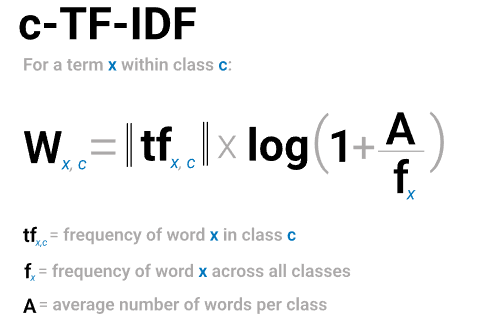


Each cluster is converted to a single document instead of a set of documents. Then, we extract the frequency of word `x` in class `c`, where `c` refers to the cluster we created before. This results in our class-based `tf` representation. This representation is L1-normalized to account for the differences in topic sizes.

Then, we take take the logarithm of one plus the average number of words per class A divided by the frequency of word `x` across all classes. We add plus one within the logarithm to force values to be positive. This results in our class-based idf representation. Like with the classic TF-IDF, we then multiply `tf` with `idf` to get the importance score per word in each class. In other words, the classical TF-IDF procedure is not used here but a modified version of the algorithm that allows for a much better representation.

This class-based TF-IDF representation is enabled by default in BERTopic. However, we can explicitly pass it to BERTopic through the ctfidf_model allowing for parameter tuning and the customization of the topic extraction technique:

In [ ]:
from bertopic.vectorizers import ClassTfidfTransformer

ctfidf_model = ClassTfidfTransformer()
topic_model = BERTopic(ctfidf_model=ctfidf_model).fit(docs)